In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/deepspeech


In [8]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import torch.cuda.amp as amp
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils, predict

## Prediction

In [9]:
m, pt = predict.load('purzelrakete/feldberlin-deepspeech/212d0t74')
p = m.cfg
p.graphemes = np.array(p.graphemes)

In [10]:
ds = datasets.yesno(p)
ds = datasets.SpecAugmented(ds, p, masked=False)

In [15]:
batch = [ds[i] for i in range(20)]
x, xn, y, yn = datasets.batch(p)(batch)

In [16]:
yhat, loss = predict.predict(m, x, xn, y, yn)

In [17]:
loss

tensor(17.3434)

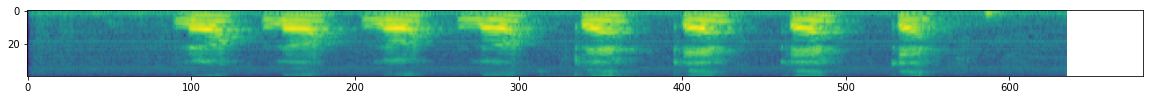

In [24]:
plt.figure(figsize=(20, 20))
plt.imshow(x[0].log2().detach().numpy())